#**Importações** 


***Bibliotecas e instalações***

In [ ]:
pip install pandera

In [ ]:
import pandas as pd
import pandera as pa
from google.cloud import storage
from matplotlib import pyplot as plt
import os

In [ ]:
pip install fsspec

In [ ]:
pip install gcsfs

***Importando DataFrame***

In [ ]:
df = pd.read_csv(r'gs://projetofinalgrupo8/entrada/LinkedIn_Profile_Data.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.head(10)

,c_id,avg_time_in_previous_position,avg_current_position_length,avg_previous_position_length,m_urn,m_urn_id,no_of_promotions,no_of_previous_positions,current_position_length,age,beauty,beauty_female,beauty_male,blur,emo_anger,emp_disgust,emo_fear,emo_happiness,emo_neutral,emo_sadness,emo_surprise,ethnicity,gender,glass,head_pitch,head_roll,head_yaw,mouth_close,mouth_mask,mouth_open,mouth_other,skin_acne,skin_dark_circle,skin_health,skin_stain,smile,nationality,african,celtic_english,east_asian,european,greek,hispanic,jewish,muslim,nordic,south_asian,n_followers,face_quality
0,1,2.000000,457.0,1338.000000,urn:li:member:149435456,3008,1,1,457,37,57.57,63.829,57.57,0.421,76.6,0.7,0.7,99.035,0.086,0.007,0.091,Asian,Male,Normal,7.735048,-5.195693,12.394546,100.0,0.0,0.0,0.0,0.734,3.295,34.366,1.411,77.536,east_asian,0.0,6.04,87.77,5.27,0.0,0.0,0.0,0.0,0.0,0.0,420,67.662
1,2,1.500000,212.0,897.500000,urn:li:member:149435456,3008,1,2,212,37,57.57,63.829,57.57,0.421,76.6,0.7,0.7,99.035,0.086,0.007,0.091,Asian,Male,Normal,7.735048,-5.195693,12.394546,100.0,0.0,0.0,0.0,0.734,3.295,34.366,1.411,77.536,east_asian,0.0,6.04,87.77,5.27,0.0,0.0,0.0,0.0,0.0,0.0,420,67.662
2,3,1.333333,243.0,669.000000,urn:li:member:149435456,3008,1,3,243,37,57.57,63.829,57.57,0.421,76.6,0.7,0.7,99.035,0.086,0.007,0.091,Asian,Male,Normal,7.735048,-5.195693,12.394546,100.0,0.0,0.0,0.0,0.734,3.295,34.366,1.411,77.536,east_asian,0.0,6.04,87.77,5.27,0.0,0.0,0.0,0.0,0.0,0.0,420,67.662
3,4,1.250000,123.0,562.500000,urn:li:member:149435456,3008,1,4,123,37,57.57,63.829,57.57,0.421,76.6,0.7,0.7,99.035,0.086,0.007,0.091,Asian,Male,Normal,7.735048,-5.195693,12.394546,100.0,0.0,0.0,0.0,0.734,3.295,34.366,1.411,77.536,east_asian,0.0,6.04,87.77,5.27,0.0,0.0,0.0,0.0,0.0,0.0,420,67.662
4,5,1.200000,244.0,474.600000,urn:li:member:149435456,3008,1,5,244,37,57.57,63.829,57.57,0.421,76.6,0.7,0.7,99.035,0.086,0.007,0.091,Asian,Male,Normal,7.735048,-5.195693,12.394546,100.0,0.0,0.0,0.0,0.734,3.295,34.366,1.411,77.536,east_asian,0.0,6.04,87.77,5.27,0.0,0.0,0.0,0.0,0.0,0.0,420,67.662
5,6,1.166667,304.0,436.166667,urn:li:member:149435456,3008,1,6,304,37,57.57,63.829,57.57,0.421,76.6,0.7,0.7,99.035,0.086,0.007,0.091,Asian,Male,Normal,7.735048,-5.195693,12.394546,100.0,0.0,0.0,0.0,0.734,3.295,34.366,1.411,77.536,east_asian,0.0,6.04,87.77,5.27,0.0,0.0,0.0,0.0,0.0,0.0,420,67.662
6,7,2.000000,457.0,1338.000000,urn:li:member:149435456,3008,1,1,457,37,57.57,63.829,57.57,0.421,76.6,0.7,0.7,99.035,0.086,0.007,0.091,Asian,Male,Normal,7.735048,-5.195693,12.394546,100.0,0.0,0.0,0.0,0.734,3.295,34.366,1.411,77.536,east_asian,0.0,6.04,87.77,5.27,0.0,0.0,0.0,0.0,0.0,0.0,420,67.662
7,8,1.500000,212.0,897.500000,urn:li:member:149435456,3008,1,2,212,37,57.57,63.829,57.57,0.421,76.6,0.7,0.7,99.035,0.086,0.007,0.091,Asian,Male,Normal,7.735048,-5.195693,12.394546,100.0,0.0,0.0,0.0,0.734,3.295,34.366,1.411,77.536,east_asian,0.0,6.04,87.77,5.27,0.0,0.0,0.0,0.0,0.0,0.0,420,67.662
8,9,1.333333,243.0,669.000000,urn:li:member:149435456,3008,1,3,243,37,57.57,63.829,57.57,0.421,76.6,0.7,0.7,99.035,0.086,0.007,0.091,Asian,Male,Normal,7.735048,-5.195693,12.394546,100.0,0.0,0.0,0.0,0.734,3.295,34.366,1.411,77.536,east_asian,0.0,6.04,87.77,5.27,0.0,0.0,0.0,0.0,0.0,0.0,420,67.662
9,10,1.250000,123.0,562.500000,urn:li:member:149435456,3008,1,4,123,37,57.57,63.829,57.57,0.421,76.6,0.7,0.7,99.035,0.086,0.007,0.091,Asian,Male,Normal,7.735048,-5.195693,12.394546,100.0,0.0,0.0,0.0,0.734,3.295,34.366,1.411,77.536,east_asian,0.0,6.04,87.77,5.27,0.0,0.0,0.0,0.0,0.0,0.0,420,67.662


#**Exploração dos dados**

***Verificando valores da coluna***

In [ ]:
df.avg_time_in_previous_position.unique()

array([ 2.        ,  1.5       ,  1.33333333,  1.25      ,  1.2       ,
        1.16666667,  1.        ,  1.66666667,  1.75      ,  4.        ,
        2.5       ,  1.14285714,  1.125     ,  1.11111111,  1.1       ,
        1.09090909,  3.        ,  2.33333333,  2.25      ,  1.83333333,
        1.71428571,  1.625     ,  1.55555556,  1.54545454,  1.46153846,
        1.42857143,  1.4       ,  5.        ,  3.5       ,  2.66666667,
        1.6       ,  1.8       ,  1.18181818,  3.33333333,  1.85714286,
        1.57142857,  4.5       ,  1.28571429,  2.2       ,  1.22222222,
        1.23076923,  1.21428571,  2.75      ,  2.4       ,  1.3       ,
        1.27272727,  1.1875    ,  1.17647059,  1.15789474,  1.15      ,
        1.13636364,  1.17391304,  1.16      ,  6.        ,  1.375     ,
        1.08333333,  1.07692308,  1.07142857,  1.44444444,  2.16666667,
        1.03448276,  1.03333333,  1.03225806,  1.03125   ,  1.03030303,
        1.02941177,  1.02857143,  1.02777778,  1.02702703,  1.02

***Listando e verificando colunas especificas***

In [ ]:
df[['avg_time_in_previous_position','ethnicity','gender',	'glass','m_urn_id','no_of_previous_positions']].head(20)

,avg_time_in_previous_position,ethnicity,gender,glass,m_urn_id,no_of_previous_positions
0,2.000000,Asian,Male,Normal,3008,1
1,1.500000,Asian,Male,Normal,3008,2
2,1.333333,Asian,Male,Normal,3008,3
3,1.250000,Asian,Male,Normal,3008,4
4,1.200000,Asian,Male,Normal,3008,5
5,1.166667,Asian,Male,Normal,3008,6
6,2.000000,Asian,Male,Normal,3008,1
7,1.500000,Asian,Male,Normal,3008,2
8,1.333333,Asian,Male,Normal,3008,3
9,1.250000,Asian,Male,Normal,3008,4


***Verificando dimensão do DataFrame***

In [ ]:
df.shape

(62706, 49)

***Visualizando colunas existentes***

In [ ]:
df.columns

Index(['c_id', 'avg_time_in_previous_position', 'avg_current_position_length',
       'avg_previous_position_length', 'm_urn', 'm_urn_id', 'no_of_promotions',
       'no_of_previous_positions', 'current_position_length', 'age', 'beauty',
       'beauty_female', 'beauty_male', 'blur', 'emo_anger', 'emp_disgust',
       'emo_fear', 'emo_happiness', 'emo_neutral', 'emo_sadness',
       'emo_surprise', 'ethnicity', 'gender', 'glass', 'head_pitch',
       'head_roll', 'head_yaw', 'mouth_close', 'mouth_mask', 'mouth_open',
       'mouth_other', 'skin_acne', 'skin_dark_circle', 'skin_health',
       'skin_stain', 'smile', 'nationality', 'african', 'celtic_english',
       'east_asian', 'european', 'greek', 'hispanic', 'jewish', 'muslim',
       'nordic', 'south_asian', 'n_followers', 'face_quality'],
      dtype='object')

#Backup

In [ ]:
df2 = df.copy()

In [ ]:
df2.head(13)

,c_id,avg_time_in_previous_position,avg_current_position_length,avg_previous_position_length,m_urn,m_urn_id,no_of_promotions,no_of_previous_positions,current_position_length,age,beauty,beauty_female,beauty_male,blur,emo_anger,emp_disgust,emo_fear,emo_happiness,emo_neutral,emo_sadness,emo_surprise,ethnicity,gender,glass,head_pitch,head_roll,head_yaw,mouth_close,mouth_mask,mouth_open,mouth_other,skin_acne,skin_dark_circle,skin_health,skin_stain,smile,nationality,african,celtic_english,east_asian,european,greek,hispanic,jewish,muslim,nordic,south_asian,n_followers,face_quality
0,1,2.000000,457.0,1338.000000,urn:li:member:149435456,3008,1,1,457,37,57.570,63.829,57.570,0.421,76.6,0.7,0.7,99.035,0.086,0.007,0.091,Asian,Male,Normal,7.735048,-5.195693,12.394546,100.00,0.0,0.000,0.000,0.734,3.295,34.366,1.411,77.536,east_asian,0.0,6.04,87.77,5.27,0.0,0.00,0.0,0.0,0.0,0.0,420,67.662
1,2,1.500000,212.0,897.500000,urn:li:member:149435456,3008,1,2,212,37,57.570,63.829,57.570,0.421,76.6,0.7,0.7,99.035,0.086,0.007,0.091,Asian,Male,Normal,7.735048,-5.195693,12.394546,100.00,0.0,0.000,0.000,0.734,3.295,34.366,1.411,77.536,east_asian,0.0,6.04,87.77,5.27,0.0,0.00,0.0,0.0,0.0,0.0,420,67.662
2,3,1.333333,243.0,669.000000,urn:li:member:149435456,3008,1,3,243,37,57.570,63.829,57.570,0.421,76.6,0.7,0.7,99.035,0.086,0.007,0.091,Asian,Male,Normal,7.735048,-5.195693,12.394546,100.00,0.0,0.000,0.000,0.734,3.295,34.366,1.411,77.536,east_asian,0.0,6.04,87.77,5.27,0.0,0.00,0.0,0.0,0.0,0.0,420,67.662
3,4,1.250000,123.0,562.500000,urn:li:member:149435456,3008,1,4,123,37,57.570,63.829,57.570,0.421,76.6,0.7,0.7,99.035,0.086,0.007,0.091,Asian,Male,Normal,7.735048,-5.195693,12.394546,100.00,0.0,0.000,0.000,0.734,3.295,34.366,1.411,77.536,east_asian,0.0,6.04,87.77,5.27,0.0,0.00,0.0,0.0,0.0,0.0,420,67.662
4,5,1.200000,244.0,474.600000,urn:li:member:149435456,3008,1,5,244,37,57.570,63.829,57.570,0.421,76.6,0.7,0.7,99.035,0.086,0.007,0.091,Asian,Male,Normal,7.735048,-5.195693,12.394546,100.00,0.0,0.000,0.000,0.734,3.295,34.366,1.411,77.536,east_asian,0.0,6.04,87.77,5.27,0.0,0.00,0.0,0.0,0.0,0.0,420,67.662
5,6,1.166667,304.0,436.166667,urn:li:member:149435456,3008,1,6,304,37,57.570,63.829,57.570,0.421,76.6,0.7,0.7,99.035,0.086,0.007,0.091,Asian,Male,Normal,7.735048,-5.195693,12.394546,100.00,0.0,0.000,0.000,0.734,3.295,34.366,1.411,77.536,east_asian,0.0,6.04,87.77,5.27,0.0,0.00,0.0,0.0,0.0,0.0,420,67.662
6,7,2.000000,457.0,1338.000000,urn:li:member:149435456,3008,1,1,457,37,57.570,63.829,57.570,0.421,76.6,0.7,0.7,99.035,0.086,0.007,0.091,Asian,Male,Normal,7.735048,-5.195693,12.394546,100.00,0.0,0.000,0.000,0.734,3.295,34.366,1.411,77.536,east_asian,0.0,6.04,87.77,5.27,0.0,0.00,0.0,0.0,0.0,0.0,420,67.662
7,8,1.500000,212.0,897.500000,urn:li:member:149435456,3008,1,2,212,37,57.570,63.829,57.570,0.421,76.6,0.7,0.7,99.035,0.086,0.007,0.091,Asian,Male,Normal,7.735048,-5.195693,12.394546,100.00,0.0,0.000,0.000,0.734,3.295,34.366,1.411,77.536,east_asian,0.0,6.04,87.77,5.27,0.0,0.00,0.0,0.0,0.0,0.0,420,67.662
8,9,1.333333,243.0,669.000000,urn:li:member:149435456,3008,1,3,243,37,57.570,63.829,57.570,0.421,76.6,0.7,0.7,99.035,0.086,0.007,0.091,Asian,Male,Normal,7.735048,-5.195693,12.394546,100.00,0.0,0.000,0.000,0.734,3.295,34.366,1.411,77.536,east_asian,0.0,6.04,87.77,5.27,0.0,0.00,0.0,0.0,0.0,0.0,420,67.662
9,10,1.250000,123.0,562.500000,urn:li:member:149435456,3008,1,4,123,37,57.570,63.829,57.570,0.421,76.6,0.7,0.7,99.035,0.086,0.007,0.091,Asian,Male,Normal,7.735048,-5.195693,12.394546,100.00,0.0,0.000,0.000,0.734,3.295,34.366,1.411,77.536,east_asian,0.0,6.04,87.77,5.27,0.0,0.00,0.0,0.0,0.0,0.0,420,67.662


#Dropando colunas


In [ ]:
df2.shape

(62706, 49)

***Removendo colunas irrelevantes***

In [ ]:
df2 = df2.drop(['c_id','m_urn','avg_current_position_length','no_of_promotions','head_pitch','head_roll','head_yaw', 
                'mouth_close', 'mouth_mask', 'mouth_open','mouth_other','beauty',
                'skin_acne', 'skin_dark_circle', 'skin_health','skin_stain',
                'african', 'celtic_english','east_asian', 'european', 'greek',
                'hispanic', 'jewish', 'muslim','nordic', 'south_asian','beauty_female', 
                'beauty_male','avg_previous_position_length'], axis=1)

***Visualizando colunas restantes***

In [ ]:
df2.columns

Index(['avg_time_in_previous_position', 'm_urn_id', 'no_of_previous_positions',
       'current_position_length', 'age', 'blur', 'emo_anger', 'emp_disgust',
       'emo_fear', 'emo_happiness', 'emo_neutral', 'emo_sadness',
       'emo_surprise', 'ethnicity', 'gender', 'glass', 'smile', 'nationality',
       'n_followers', 'face_quality'],
      dtype='object')

***Removendo linhas com 'm_urn_id' repetidos***

In [ ]:
df2 = df2.drop_duplicates(subset=['m_urn_id'])

In [ ]:
df2.head(10)

,avg_time_in_previous_position,m_urn_id,no_of_previous_positions,current_position_length,age,blur,emo_anger,emp_disgust,emo_fear,emo_happiness,emo_neutral,emo_sadness,emo_surprise,ethnicity,gender,glass,smile,nationality,n_followers,face_quality
0,2.0,3008,1,457,37,0.421,76.6,0.7,0.7,99.035,0.086,0.007,0.091,Asian,Male,Normal,77.536,east_asian,420,67.662
12,2.0,3009,1,245,39,0.647,6629.1,161.3,646.7,8.816,0.697,0.446,15.670,Black,Female,Normal,55.243,hispanic,1676,32.126
13,1.0,3010,1,1827,37,64.262,8.2,8.2,8.2,9.585,63.067,0.103,26.998,White,Male,Normal,63.774,hispanic,319,0.006
15,1.0,3011,1,1065,59,0.435,150.6,215.7,9.8,95.314,0.728,0.098,0.098,White,Male,None,93.269,celtic_english,2381,88.694
21,1.0,3012,1,243,31,2.125,0.7,17.5,5.7,73.232,14.742,0.007,11.779,White,Male,Normal,6.671,celtic_english,332,55.399
23,1.0,3013,1,3925,42,0.354,0.0,0.0,0.0,100.000,0.000,0.000,0.000,White,Female,None,97.428,hispanic,784,94.145
27,1.0,3014,1,699,51,0.317,1.5,34.7,29.4,98.661,0.086,0.015,0.582,White,Female,None,98.941,celtic_english,1607,59.917
35,1.0,3015,1,61,42,0.371,0.0,0.0,0.0,100.000,0.000,0.000,0.000,White,Male,None,94.807,european,2222,75.535
42,1.0,3016,1,395,33,0.357,0.0,0.0,0.0,96.423,3.435,0.002,0.139,Asian,Male,Normal,10.482,east_asian,1259,94.098
53,2.0,3017,1,1096,50,2.314,0.0,0.0,0.0,100.000,0.000,0.000,0.000,White,Male,None,95.800,celtic_english,331,87.997


#Renomeando colunas

***Criando listas para renomear colunas***

In [ ]:
col_old = ['avg_time_in_previous_position', 'm_urn_id', 
           'no_of_previous_positions', 'age','blur', 'emo_anger', 
           'emp_disgust', 'emo_fear', 'emo_happiness','emo_neutral', 'emo_sadness','emo_surprise', 'ethnicity', 
           'gender', 'glass', 'smile', 'nationality','n_followers', 'face_quality']

col_new = ['tempo_cargo_anterior', 'id_usuario', 'promocoes','dias_cargo_anterior',
           'idade', 'desfoque', 'raiva', 'desgosto', 'medo','felicidade','neutro','triste', 'surpresa', 
           'etnia', 'genero', 'oculos','sorriso','nacionalidade','seguidores', 'qualidade_imagem']

In [ ]:
df2.columns = col_new

***Verificando colunas renomeadas***

In [ ]:
df2.columns

Index(['tempo_cargo_anterior', 'id_usuario', 'promocoes',
       'dias_cargo_anterior', 'idade', 'desfoque', 'raiva', 'desgosto', 'medo',
       'felicidade', 'neutro', 'triste', 'surpresa', 'etnia', 'genero',
       'oculos', 'sorriso', 'nacionalidade', 'seguidores', 'qualidade_imagem'],
      dtype='object')

#Identificando as colunas a serem traduzidas


***Selecionando apenas as colunas com string***

In [ ]:
df2.select_dtypes(include='object')

,etnia,genero,oculos,nacionalidade
0,Asian,Male,Normal,east_asian
12,Black,Female,Normal,hispanic
13,White,Male,Normal,hispanic
15,White,Male,None,celtic_english
21,White,Male,Normal,celtic_english
...,...,...,...,...
62684,White,Male,Normal,south_asian
62688,White,Male,None,nordic
62690,White,Male,Normal,south_asian
62695,White,Male,Normal,celtic_english


#Vericando e modificando a coluna 'etnia'

***Consultando valores da coluna***

In [ ]:
df2['etnia'].unique()

array(['Asian', 'Black', 'White'], dtype=object)

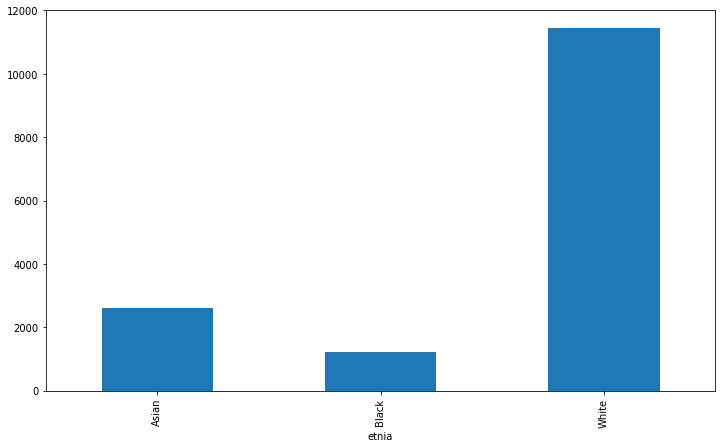

In [ ]:
df2.groupby(["etnia"]).genero.count().plot.bar(figsize=(12,7))

***Realizando alterações dos valores***

In [ ]:
etnias_antigas = ['Asian', 'Black', 'White']
etnias_novas = ['Asiático','Negro','Branco']

In [ ]:
df2['etnia'] = df2['etnia'].replace(etnias_antigas, etnias_novas)

#Vericando e modificando a coluna 'genero'

***Verificando valores da coluna***

In [ ]:
df2['genero'].unique()

array(['Male', 'Female'], dtype=object)

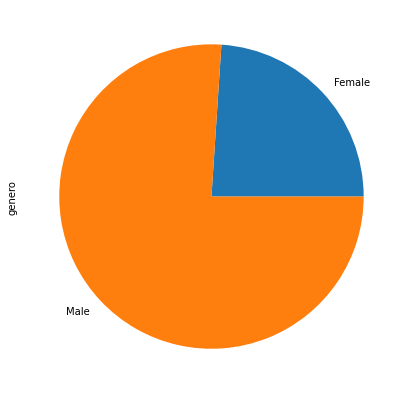

In [ ]:
df2.groupby(["genero"]).genero.count().plot.pie(figsize=(12,7))

***Realizando alterações dos valores***

In [ ]:
generos_antigos = ['Male','Female']
generos_novos = ['Masculino','Feminino']

In [ ]:
df2['genero'] = df2['genero'].replace(generos_antigos, generos_novos)

#Vericando e modificando a coluna 'oculos'

***Verificando valores da coluna***

In [ ]:
df2.groupby(["oculos"]).genero.count().plot.bar(figsize=(12,7))

In [ ]:
df2['oculos'].unique()

array(['Normal', 'None', 'Dark'], dtype=object)

***Realizando alterações dos valores***

In [ ]:
oculos_antigos = ['Normal', 'None', 'Dark']
oculos_novos = ['Oculos_comum', 'Nenhum', 'Oculos_escuros']

In [ ]:
df2['oculos'] = df2['oculos'].replace(oculos_antigos, oculos_novos)

#Vericando e modificando a coluna 'nacionalidade'

***Verificando valores da coluna***

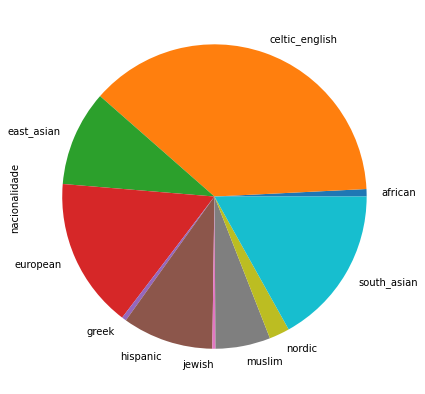

In [ ]:
df2.groupby(["nacionalidade"]).nacionalidade.count().plot.pie(figsize=(12,7))

In [ ]:
df2['nacionalidade'].unique()

array(['east_asian', 'hispanic', 'celtic_english', 'european', 'muslim',
       'south_asian', 'nordic', 'african', 'jewish', 'greek'],
      dtype=object)

***Realizando alterações dos valores***

In [ ]:
nacionalidades_antigas = ['east_asian', 'hispanic', 'celtic_english', 'european', 'muslim',
       'south_asian', 'nordic', 'african', 'jewish', 'greek']
nacionalidades_novas = ['asiatico_leste', 'hispanico', 'ingles', 'europeu', 'muculmano',
       'asiatico_sul', 'nordico', 'africano', 'judeu', 'grego']

In [ ]:
df2['nacionalidade'] = df2['nacionalidade'].replace(nacionalidades_antigas, nacionalidades_novas)

#Verificando a coluna 'idade'

***Consultando as idades***

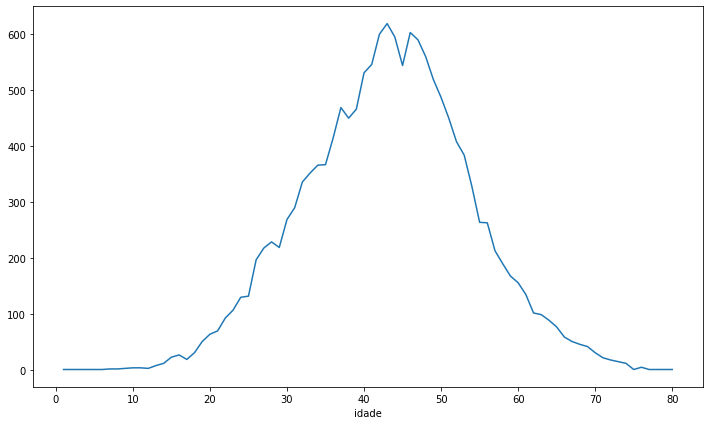

In [ ]:
df2.groupby(["idade"]).idade.count().plot.line(figsize=(12,7))

In [ ]:
df2.idade.unique()

array([37, 39, 59, 31, 42, 51, 33, 50, 35, 47, 38, 61, 26, 44, 28, 60, 41,
       19, 46, 25, 30, 58, 48, 40, 52, 34, 56, 49, 36, 45, 27, 55, 43, 63,
       53, 57, 54, 20, 32, 22, 29, 65, 66, 23, 67, 24, 73, 71, 68, 13, 16,
       21, 62, 17, 18,  6, 70, 14, 69, 64, 12, 72, 78, 15,  7,  9, 74, 10,
       11,  4, 76,  8, 75, 80,  1, 77,  3])

***Filtrando idades menores que 16***

In [ ]:
indexIdades = df2[ df2['idade'] < 16 ].index

***Removendo as idades filtradas***

In [ ]:
df2.drop(indexIdades , inplace=True)

In [ ]:
df2.idade.unique()

array([37, 39, 59, 31, 42, 51, 33, 50, 35, 47, 38, 61, 26, 44, 28, 60, 41,
       19, 46, 25, 30, 58, 48, 40, 52, 34, 56, 49, 36, 45, 27, 55, 43, 63,
       53, 57, 54, 20, 32, 22, 29, 65, 66, 23, 67, 24, 73, 71, 68, 16, 21,
       62, 17, 18, 70, 69, 64, 72, 78, 74, 76, 75, 80, 77])

#Verificando inconsistências na coluna 'Cargo'

***Criando uma lista com os 'tempo_cargo_atual' menor que 0***

In [ ]:
indexCargos = df2[ df2['dias_cargo_anterior'] < 0 ].index

***Removendo valores negativos da coluna***

In [ ]:
df2.drop(indexCargos , inplace=True)

#Verificando os tipos de dados do DataFrame

In [ ]:
df2.dtypes

tempo_cargo_anterior    float64
id_usuario                int64
promocoes                 int64
dias_cargo_anterior       int64
idade                     int64
desfoque                float64
raiva                   float64
desgosto                float64
medo                    float64
felicidade              float64
neutro                  float64
triste                  float64
surpresa                float64
etnia                    object
genero                   object
oculos                   object
sorriso                 float64
nacionalidade            object
seguidores                int64
qualidade_imagem        float64
dtype: object

#Removendo inconsistências nas colunas 'Float'

In [ ]:
raiva100 = df2[df2["raiva"]> 100].index

In [ ]:
df2.drop(raiva100, inplace=True)

In [ ]:
medo100 = df2[df2["medo"]> 100].index

In [ ]:
df2.drop(medo100, inplace=True)

In [ ]:
desgosto100 = df2[df2["desgosto"]> 100].index

In [ ]:
df2.drop(desgosto100, inplace=True)

In [ ]:
df2.head(5)

,tempo_cargo_anterior,id_usuario,promocoes,dias_cargo_anterior,idade,desfoque,raiva,desgosto,medo,felicidade,neutro,triste,surpresa,etnia,genero,oculos,sorriso,nacionalidade,seguidores,qualidade_imagem
0,2.0,3008,1,457,37,0.421,76.6,0.7,0.7,99.035,0.086,0.007,0.091,Asiático,Masculino,Oculos_comum,77.536,asiatico_leste,420,67.662
13,1.0,3010,1,1827,37,64.262,8.2,8.2,8.2,9.585,63.067,0.103,26.998,Branco,Masculino,Oculos_comum,63.774,hispanico,319,0.006
21,1.0,3012,1,243,31,2.125,0.7,17.5,5.7,73.232,14.742,0.007,11.779,Branco,Masculino,Oculos_comum,6.671,ingles,332,55.399
23,1.0,3013,1,3925,42,0.354,0.0,0.0,0.0,100.000,0.000,0.000,0.000,Branco,Feminino,Nenhum,97.428,hispanico,784,94.145
27,1.0,3014,1,699,51,0.317,1.5,34.7,29.4,98.661,0.086,0.015,0.582,Branco,Feminino,Nenhum,98.941,ingles,1607,59.917


#Resetando Index


In [ ]:
df2 = df2.reset_index(drop=True)

In [ ]:
df2.tail()

,tempo_cargo_anterior,id_usuario,promocoes,dias_cargo_anterior,idade,desfoque,raiva,desgosto,medo,felicidade,neutro,triste,surpresa,etnia,genero,oculos,sorriso,nacionalidade,seguidores,qualidade_imagem
11836,1.0,15253,1,62,39,0.814,0.0,0.7,0.1,99.985,0.002,0.003,0.000,Branco,Masculino,Oculos_comum,98.059,asiatico_sul,1204,88.130
11837,1.0,15254,1,1916,44,0.360,0.1,0.1,40.3,99.381,0.001,0.200,0.012,Branco,Masculino,Nenhum,82.463,nordico,910,91.300
11838,1.0,15255,1,90,44,19.594,0.0,0.0,0.0,100.000,0.000,0.000,0.000,Branco,Masculino,Oculos_comum,98.991,asiatico_sul,559,77.526
11839,2.0,15256,1,3408,38,0.132,0.0,0.1,0.2,99.992,0.005,0.000,0.000,Branco,Masculino,Oculos_comum,96.044,ingles,725,94.078
11840,1.0,15257,1,120,60,1.403,0.0,0.1,0.0,99.999,0.000,0.000,0.000,Branco,Masculino,Nenhum,95.029,hispanico,279,81.883


#Validando Schema

In [ ]:
schema = pa.DataFrameSchema(
    columns = {
        "tempo_cargo_anterior":pa.Column(pa.Float),
        "id_usuario":pa.Column(pa.Int),
        "promocoes":pa.Column(pa.Int),
        "dias_cargo_anterior":pa.Column(pa.Int),
        "idade":pa.Column(pa.Int),
        "desfoque":pa.Column(pa.Float),
        "raiva":pa.Column(pa.Float),
        "desgosto":pa.Column(pa.Float),
        "medo":pa.Column(pa.Float),
        "felicidade":pa.Column(pa.Float),
        "neutro":pa.Column(pa.Float),
        "triste":pa.Column(pa.Float),
        "surpresa":pa.Column(pa.Float),
        "etnia":pa.Column(pa.String),
        "genero":pa.Column(pa.String),
        "oculos":pa.Column(pa.String),
        "sorriso":pa.Column(pa.Float),
        "nacionalidade":pa.Column(pa.String),
        "seguidores":pa.Column(pa.Int),
        "qualidade_imagem":pa.Column(pa.Float),
    }
)


In [ ]:
schema.validate(df2)

,tempo_cargo_anterior,id_usuario,promocoes,dias_cargo_anterior,idade,desfoque,raiva,desgosto,medo,felicidade,neutro,triste,surpresa,etnia,genero,oculos,sorriso,nacionalidade,seguidores,qualidade_imagem
0,2.0,3008,1,457,37,0.421,76.6,0.7,0.7,99.035,0.086,0.007,0.091,Asiático,Masculino,Oculos_comum,77.536,asiatico_leste,420,67.662
1,1.0,3010,1,1827,37,64.262,8.2,8.2,8.2,9.585,63.067,0.103,26.998,Branco,Masculino,Oculos_comum,63.774,hispanico,319,0.006
2,1.0,3012,1,243,31,2.125,0.7,17.5,5.7,73.232,14.742,0.007,11.779,Branco,Masculino,Oculos_comum,6.671,ingles,332,55.399
3,1.0,3013,1,3925,42,0.354,0.0,0.0,0.0,100.000,0.000,0.000,0.000,Branco,Feminino,Nenhum,97.428,hispanico,784,94.145
4,1.0,3014,1,699,51,0.317,1.5,34.7,29.4,98.661,0.086,0.015,0.582,Branco,Feminino,Nenhum,98.941,ingles,1607,59.917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11836,1.0,15253,1,62,39,0.814,0.0,0.7,0.1,99.985,0.002,0.003,0.000,Branco,Masculino,Oculos_comum,98.059,asiatico_sul,1204,88.130
11837,1.0,15254,1,1916,44,0.360,0.1,0.1,40.3,99.381,0.001,0.200,0.012,Branco,Masculino,Nenhum,82.463,nordico,910,91.300
11838,1.0,15255,1,90,44,19.594,0.0,0.0,0.0,100.000,0.000,0.000,0.000,Branco,Masculino,Oculos_comum,98.991,asiatico_sul,559,77.526
11839,2.0,15256,1,3408,38,0.132,0.0,0.1,0.2,99.992,0.005,0.000,0.000,Branco,Masculino,Oculos_comum,96.044,ingles,725,94.078


#Exportando DataFrame para o GCP

In [ ]:
from google.cloud import storage
import os
serviceAccount = '/content/projetofinalgrupo8-2dcd866c3f46.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount


client = storage.Client()
bucket = client.get_bucket('projetofinalgrupo8')
    
bucket.blob('saida/linkedin_tratado_pandas.csv').upload_from_string(df2.to_csv(index=False), 'text/csv')